In [1]:
import os

path = './train_data/'
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('default')

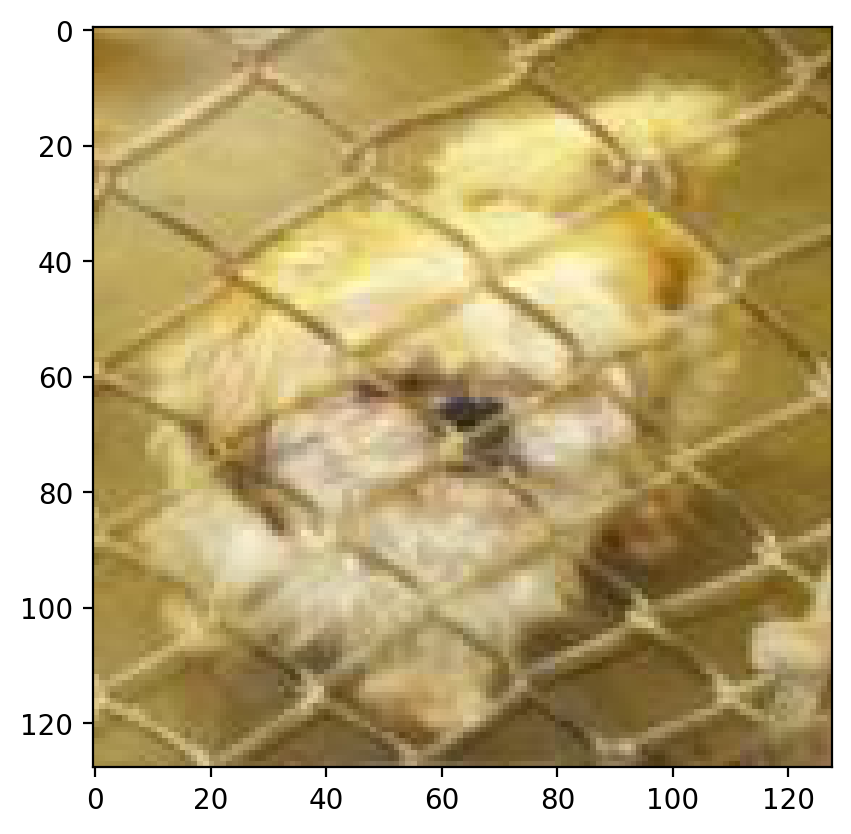

In [5]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image);

In [6]:
from skimage.transform import resize
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

In [7]:
images = []
bar_total = tqdm(full_names)

for file in bar_total:
    img = mpimg.imread(path + file)
    images.append(img)

In [8]:
images = np.array(images)

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 1]), array(['cat', 'dog'], dtype='<U3'))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
                train_test_split(images, labels_encoded, test_size=0.2,
                                 random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((20000, 128, 128, 3), (5000, 128, 128, 3))

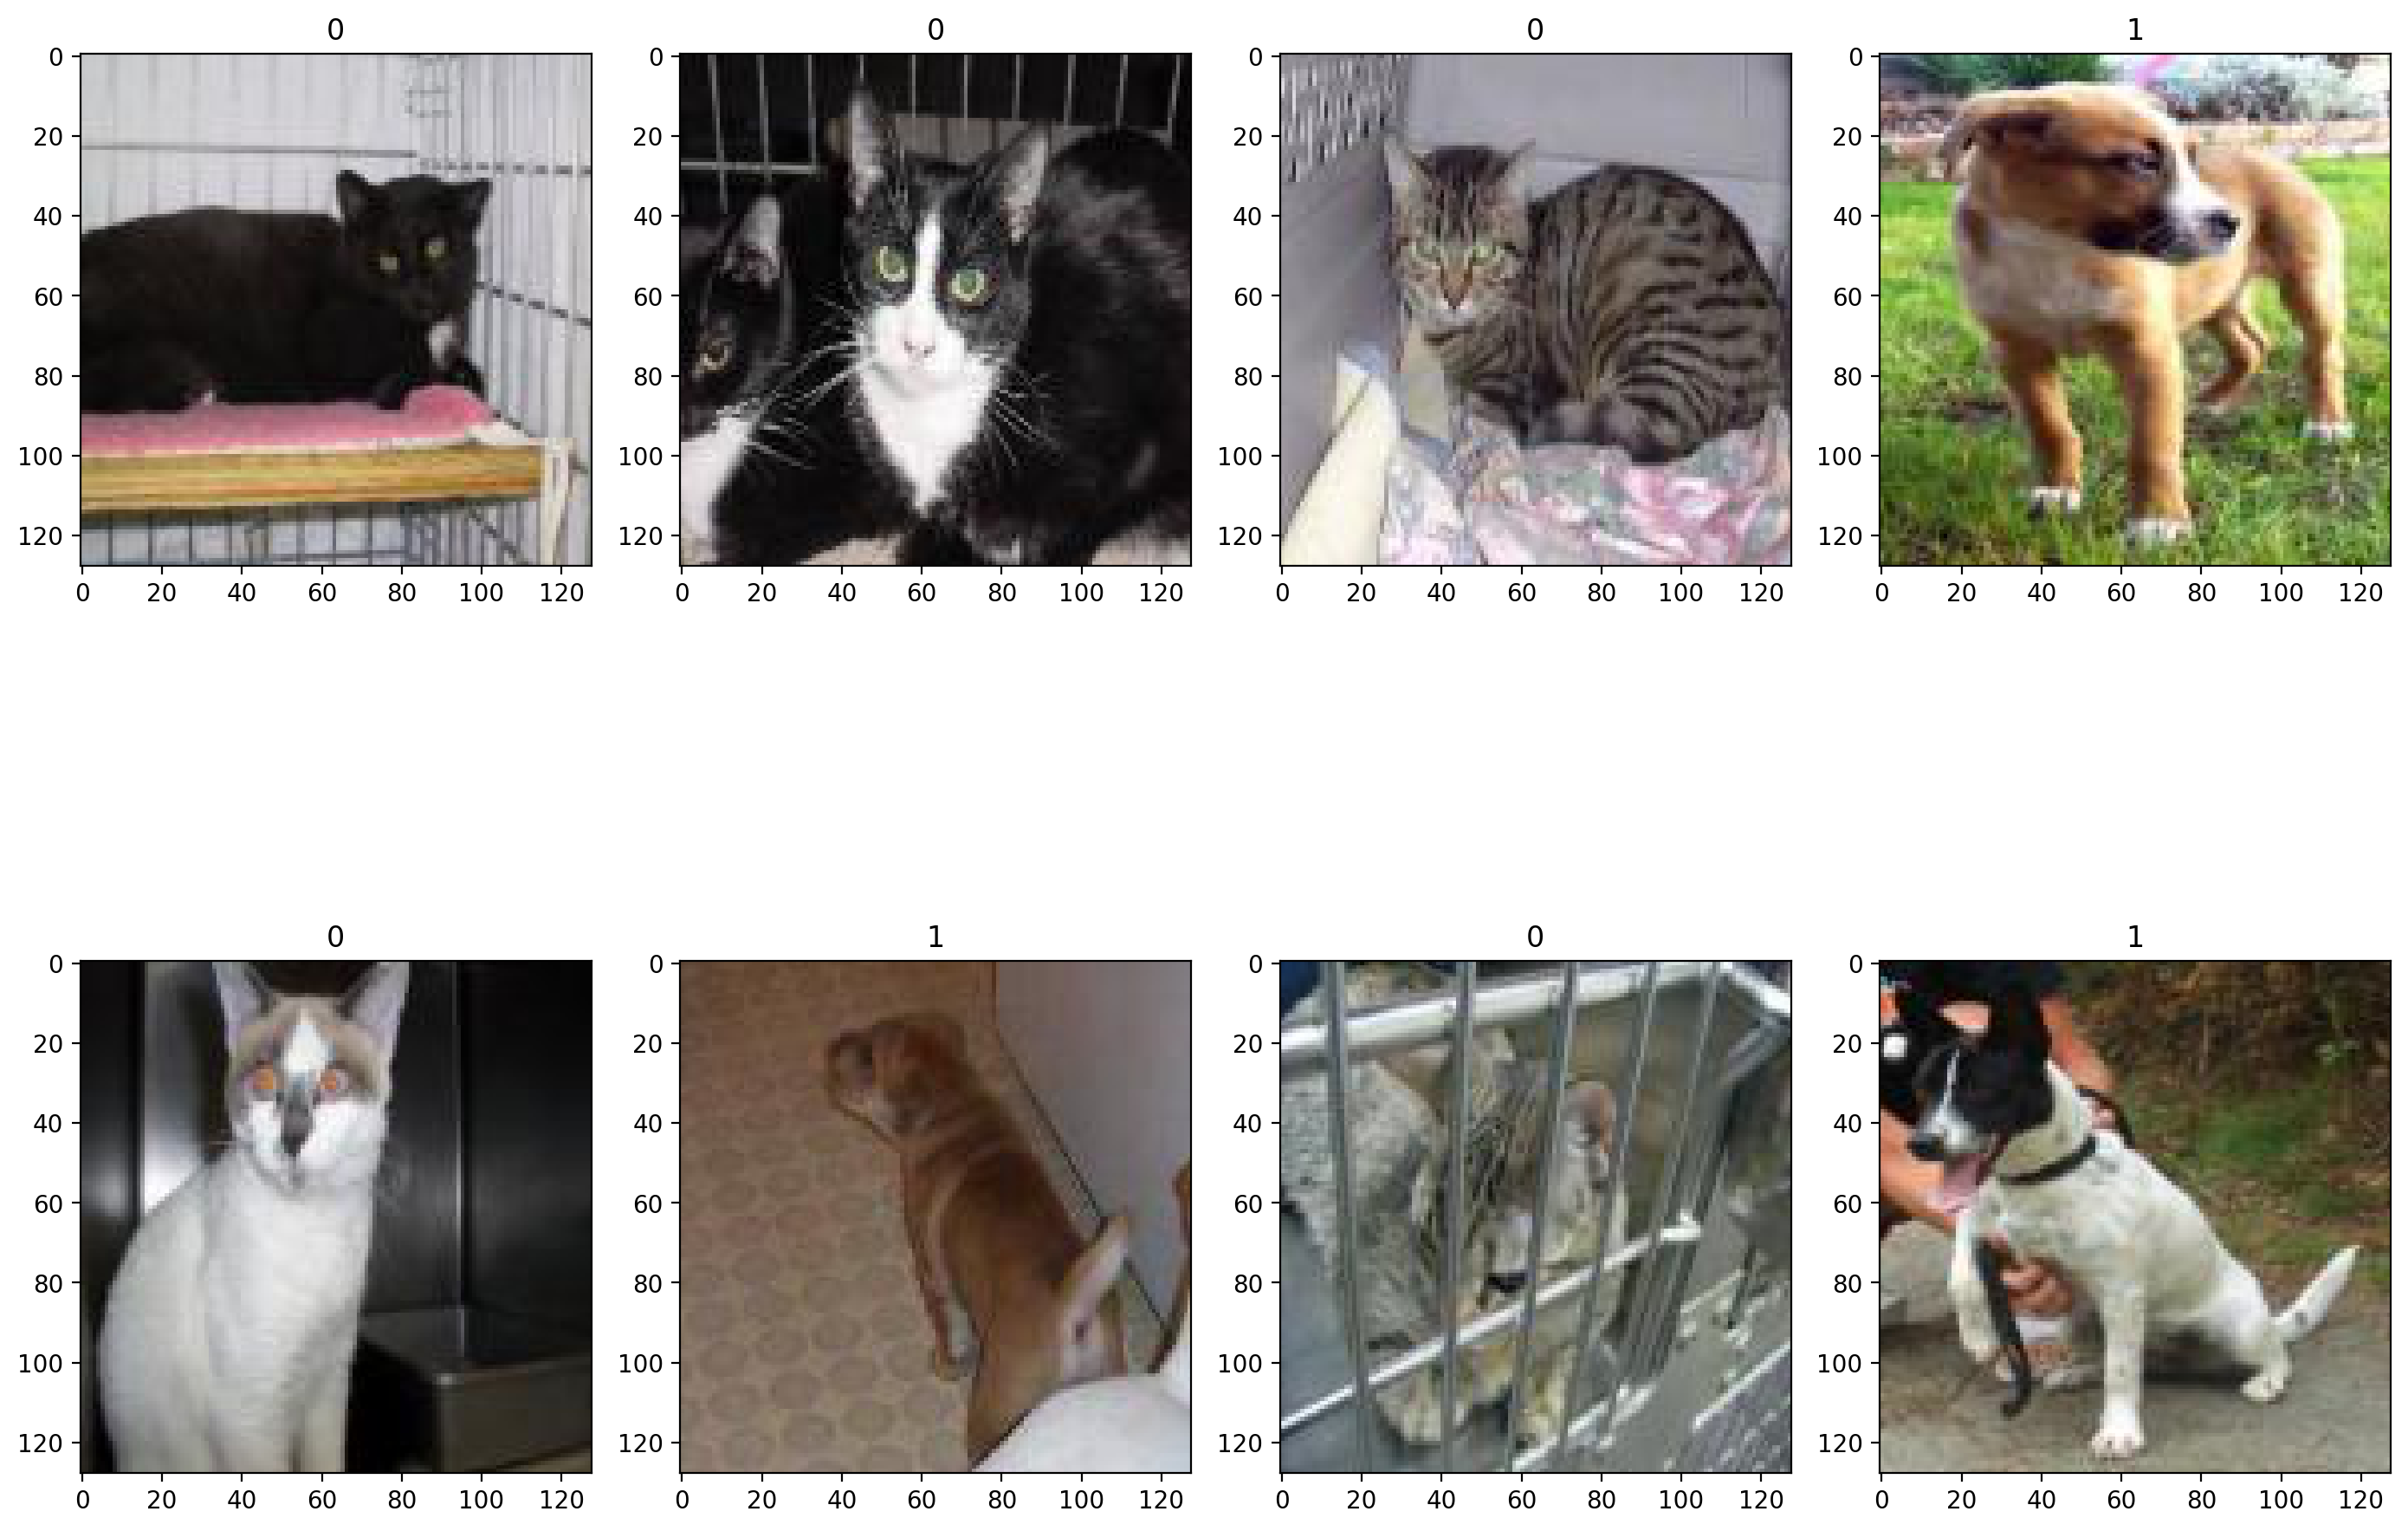

In [12]:
samples = random.choices(population=range(0,20000), k=8)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(2,4,idx+1)
    plt.imshow(X_train[n], cmap='Greys',
               interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3), 
                 padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0

In [14]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000,128,128,3), y_train,
                 epochs=10, verbose=1, batch_size=10,
                 validation_data = (X_test.reshape(5000,128,128,3), y_test))

print('fit_time : ', time.time() - start_time)

Epoch 1/10
2000/2000 [==============================] - 477s 238ms/step - loss: 7.1628 - accuracy: 0.5579 - val_loss: 0.6736 - val_accuracy: 0.5636
Epoch 2/10
2000/2000 [==============================] - 565s 283ms/step - loss: 0.6638 - accuracy: 0.5947 - val_loss: 0.6742 - val_accuracy: 0.5774
Epoch 3/10
1062/2000 [==============>...............] - ETA: 4:11 - loss: 0.6641 - accuracy: 0.5934

KeyboardInterrupt: 

In [ ]:
# plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plot_target = ['accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend(); plt.grid();